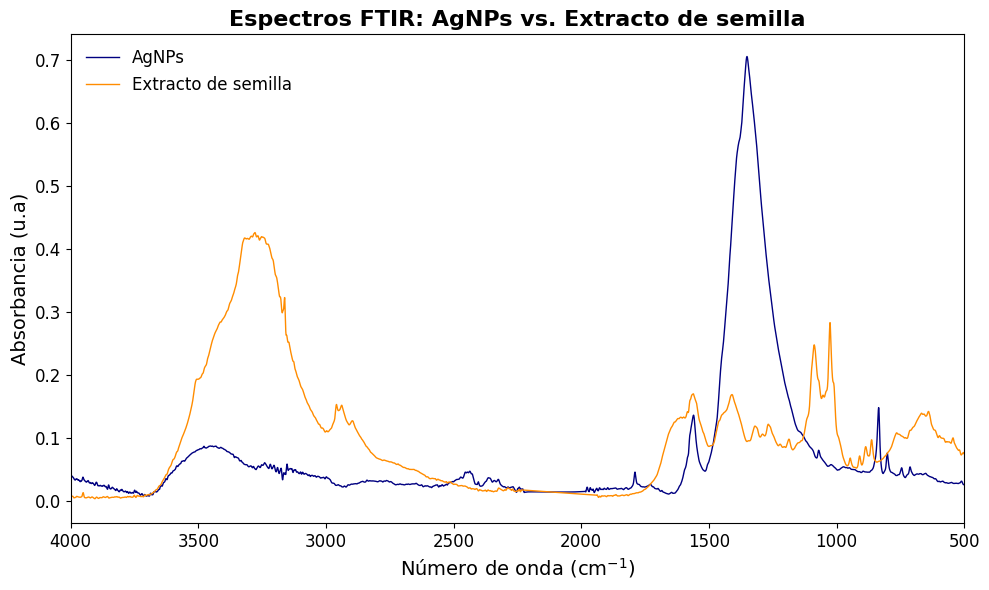

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Ruta al archivo Excel
ruta_excel = '../files/input/FTIR.xlsx'

# Cargar el archivo Excel desde la segunda fila como encabezado
df = pd.read_excel(ruta_excel, header=1)

# Asignar columnas a variables
wn_ag = df['Número de onda (cm-1)']          # Número de onda (cm⁻¹) para AgNPs
abs_ag = df['Absorbancia (u.a)']             # Absorbancia (u.a) para AgNPs
wn_seed = df['Número de onda (cm-1).1']      # Número de onda (cm⁻¹) para Semilla
abs_seed = df['Absorbancia (u.a).1']         # Absorbancia (u.a) para Semilla

# Crear la figura
plt.figure(figsize=(10, 6))

# Graficar los espectros con líneas más delgadas
plt.plot(wn_ag, abs_ag, label='AgNPs', color='navy', linewidth=1)
plt.plot(wn_seed, abs_seed, label='Extracto de semilla', color='darkorange', linewidth=1)

# Ajustar ejes y etiquetas
plt.gca().invert_xaxis()  # Invertir el eje X para estilo FTIR
plt.xlim(4000, 500)  # Ajustar rango del eje X
plt.xlabel('Número de onda (cm$^{-1}$)', fontsize=14)
plt.ylabel('Absorbancia (u.a)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Eliminar márgenes para el eje X
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)

# Añadir título y leyenda mejorada
plt.title('Espectros FTIR: AgNPs vs. Extracto de semilla', fontsize=16, weight='bold')
plt.legend(loc='upper left', fontsize=12, frameon=False)

# Ajustar diseño general
plt.tight_layout()

# Crear la carpeta si no existe
output_dir = '../files/plots/'
os.makedirs(output_dir, exist_ok=True)

# Guardar el gráfico en la ubicación especificada
plt.savefig(os.path.join(output_dir, 'spectrum.png'), dpi=300)

# Mostrar el gráfico
plt.show()

Archivo '../files/input/FTIR.xlsx' cargado exitosamente.
Gráfico final para publicación guardado en: '../files/plots/FTIR_espectro.png'


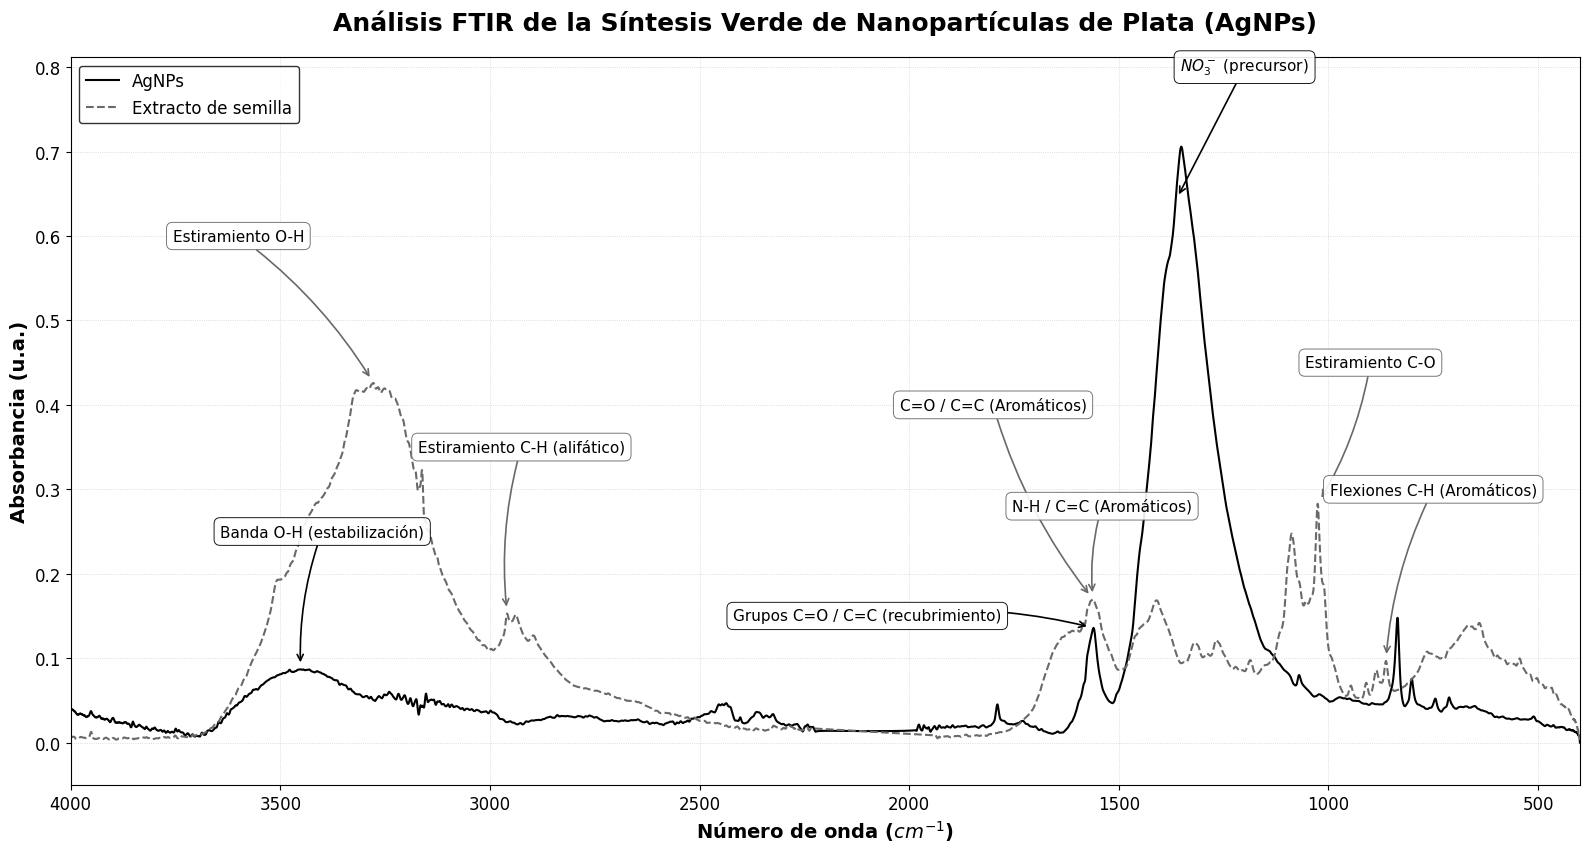

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

# --- Función para encontrar el pico exacto ---
def find_peak(data, wn_approx, window=50):
    """
    Encuentra la absorbancia máxima (pico) en una ventana alrededor de un número de onda aproximado.
    
    Args:
        data (pd.DataFrame): DataFrame con columnas 'wn' y 'abs'.
        wn_approx (float): Número de onda aproximado para buscar el pico.
        window (int): Ancho de la ventana de búsqueda (ej. +/- 50 cm-1).
        
    Returns:
        tuple: (wn_pico, abs_pico) con las coordenadas exactas del pico.
    """
    peak_region = data[(data['wn'] > wn_approx - window) & (data['wn'] < wn_approx + window)]
    if peak_region.empty:
        # Si no hay datos en la ventana, devuelve la posición aproximada.
        return (wn_approx, np.interp(wn_approx, data['wn'], data['abs']))
    
    # Encuentra el índice de la absorbancia máxima en la región
    peak_idx = peak_region['abs'].idxmax()
    
    # Devuelve las coordenadas exactas del pico
    peak_wn = peak_region.loc[peak_idx, 'wn']
    peak_abs = peak_region.loc[peak_idx, 'abs']
    
    return (peak_wn, peak_abs)

# --- Carga de Datos ---
try:
    ruta_excel = '../files/input/FTIR.xlsx'
    df = pd.read_excel(ruta_excel, header=1)
    
    # Asignar columnas y limpiar datos
    wn_ag = pd.to_numeric(df['Número de onda (cm-1)'], errors='coerce')
    abs_ag = pd.to_numeric(df['Absorbancia (u.a)'], errors='coerce')
    wn_seed = pd.to_numeric(df['Número de onda (cm-1).1'], errors='coerce')
    abs_seed = pd.to_numeric(df['Absorbancia (u.a).1'], errors='coerce')

    ag_data = pd.DataFrame({'wn': wn_ag, 'abs': abs_ag}).dropna().sort_values(by='wn')
    seed_data = pd.DataFrame({'wn': wn_seed, 'abs': abs_seed}).dropna().sort_values(by='wn')
    print(f"Archivo '{ruta_excel}' cargado exitosamente.")

except FileNotFoundError:
    print(f"Error: No se encontró el archivo en la ruta '{ruta_excel}'.")
    print("Generando datos de ejemplo para la demostración.")
    
    # --- Generación de Datos de Ejemplo Mejorados ---
    wn_base = np.linspace(400, 4000, 2000)
    
    # Espectro del extracto de semilla (rico en polifenoles)
    abs_seed_sim = (np.exp(-((wn_base - 3340) / 150)**2) * 0.45 +
                    np.exp(-((wn_base - 2925) / 30)**2) * 0.18 +
                    np.exp(-((wn_base - 1630) / 40)**2) * 0.25 +
                    np.exp(-((wn_base - 1540) / 35)**2) * 0.12 +
                    np.exp(-((wn_base - 1250) / 50)**2) * 0.20 +
                    np.exp(-((wn_base - 1050) / 60)**2) * 0.22 +
                    np.exp(-((wn_base - 830) / 40)**2) * 0.10 +
                    np.random.normal(0, 0.005, len(wn_base)))
    seed_data = pd.DataFrame({'wn': wn_base, 'abs': abs_seed_sim})

    # Espectro de las AgNPs
    abs_ag_sim = (abs_seed_sim * 0.35 + 
                  np.exp(-((wn_base - 1384) / 15)**2) * 0.72 +
                  np.random.normal(0, 0.005, len(wn_base)))
    ag_data = pd.DataFrame({'wn': wn_base, 'abs': abs_ag_sim})

    ag_data.loc[ag_data['abs'] < 0, 'abs'] = 0.01
    seed_data.loc[seed_data['abs'] < 0, 'abs'] = 0.01

# --- Creación del Gráfico ---
fig, ax = plt.subplots(figsize=(16, 9))

ax.plot(ag_data['wn'], ag_data['abs'], label='AgNPs', color='black', linewidth=1.5)
ax.plot(seed_data['wn'], seed_data['abs'], label='Extracto de semilla', color='dimgray', linewidth=1.5, linestyle='--')

# --- Ajustes de Ejes y Etiquetas ---
ax.invert_xaxis()
ax.set_xlim(4000, 400)
ax.set_ylim(-0.05, max(ag_data['abs'].max(), seed_data['abs'].max()) * 1.15)
ax.set_xlabel('Número de onda ($cm^{-1}$)', fontsize=14, weight='bold')
ax.set_ylabel('Absorbancia (u.a.)', fontsize=14, weight='bold')
ax.tick_params(axis='both', which='major', labelsize=12)
ax.grid(True, linestyle=':', linewidth=0.6, color='lightgray')

# --- Título y Leyenda ---
ax.set_title('Análisis FTIR de la Síntesis Verde de Nanopartículas de Plata (AgNPs)', fontsize=18, weight='bold', pad=20)
ax.legend(loc='upper left', fontsize=12, frameon=True, facecolor='white', framealpha=0.8, edgecolor='black')

# --- Anotaciones de Picos Característicos con Diseño Clásico ---
# Lista de anotaciones: [texto, wn_aprox, datos, pos_texto_xy, color, rad_curva, ventana_busqueda]
annotations = [
    # --- Picos clave del EXTRACTO (color gris oscuro) ---
    ['Estiramiento O-H', 3340, seed_data, (3600, 0.6), 'dimgray', -0.1, 150],
    ['Estiramiento C-H (alifático)', 2925, seed_data, (2925, 0.35), 'dimgray', 0.1, 50],
    ['C=O / C=C (Aromáticos)', 1630, seed_data, (1800, 0.4), 'dimgray', 0.1, 80],
    ['N-H / C=C (Aromáticos)', 1540, seed_data, (1540, 0.28), 'dimgray', 0.1, 50],
    ['Estiramiento C-O', 1050, seed_data, (900, 0.45), 'dimgray', -0.1, 80],
    ['Flexiones C-H (Aromáticos)', 830, seed_data, (750, 0.3), 'dimgray', 0.1, 50],
    
    # --- Picos clave en las AgNPs (color negro) ---
    ['$NO_3^-$ (precursor)', 1384, ag_data, (1200, 0.8), 'black', 0.0, 20],
    ['Grupos C=O / C=C (recubrimiento)', 1630, ag_data, (2100, 0.15), 'black', -0.1, 80],
    ['Banda O-H (estabilización)', 3340, ag_data, (3400, 0.25), 'black', 0.1, 150]
]

for label, wn_approx, data, txt_pos, arrow_color, rad, window in annotations:
    # 1. Encontrar el pico exacto
    peak_wn, peak_abs = find_peak(data, wn_approx, window)
    
    # 2. Anotar con la flecha apuntando al pico exacto
    ax.annotate(label,
                xy=(peak_wn, peak_abs),
                xytext=txt_pos,
                fontsize=11,
                ha='center',
                va='center',
                bbox=dict(boxstyle="round,pad=0.4", fc="white", ec=arrow_color, lw=0.7, alpha=0.9),
                arrowprops=dict(
                    arrowstyle="->",
                    color=arrow_color,
                    linewidth=1.2,
                    shrinkA=0, 
                    shrinkB=5, 
                    connectionstyle=f"arc3,rad={rad}" # Controlar curvatura
                ))

# --- Ajustes Finales y Guardado ---
plt.tight_layout(rect=[0, 0, 1, 0.96])

output_dir = '../files/plots/'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

output_path = os.path.join(output_dir, 'FTIR_espectro.png')
plt.savefig(output_path, dpi=300, bbox_inches='tight')
print(f"Gráfico final para publicación guardado en: '{output_path}'")

plt.show()

